<a href="https://colab.research.google.com/github/AkashKalme/Spaceship-Titanic/blob/main/SpaceshipTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [404]:
df_train = pd.read_csv("https://raw.githubusercontent.com/AkashKalme/Spaceship-Titanic/main/spaceship-titanic/train.csv")

In [405]:
df_test = pd.read_csv("https://raw.githubusercontent.com/AkashKalme/Spaceship-Titanic/main/spaceship-titanic/test.csv")

In [406]:
df_sub = pd.read_csv("https://raw.githubusercontent.com/AkashKalme/Spaceship-Titanic/main/spaceship-titanic/sample_submission.csv")

In [407]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [408]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [409]:
df_res = pd.DataFrame(df_test, columns=['PassengerId'])

In [410]:
df_res

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01
...,...
4272,9266_02
4273,9269_01
4274,9271_01
4275,9273_01


In [411]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [412]:
df_train.drop_duplicates(inplace=True)

In [413]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 959.3+ KB


In [414]:
df_train.shape

(8693, 14)

In [415]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [416]:
df_train.drop('PassengerId', axis=1, inplace=True)

In [418]:
df_train.dropna(thresh=13, inplace=True)

In [419]:
columns = df_train.columns
columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported'],
      dtype='object')

In [420]:
obj_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

In [421]:
for col in obj_cols:
  print(len(df_train[col].unique()))
  print(df_train[col].unique())

3
['Europa' 'Earth' 'Mars']
2
[False True]
5305
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
3
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
2
[False True]


In [422]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [423]:
def preprocess(df):
  df['Cabin'] = df['Cabin'].astype(str).str[0]
  df['Cabin'].replace('n', df['Cabin'].mode()[0], inplace=True)
  df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True)
  df['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace=True)
  df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)
  df['VIP'].fillna(df['VIP'].mode()[0], inplace=True)
  df['Age'].fillna(df['Age'].median(), inplace=True)
  df['RoomService'].fillna(df['RoomService'].mode()[0], inplace=True)
  df['FoodCourt'].fillna(df['FoodCourt'].mode()[0], inplace=True)
  df['ShoppingMall'].fillna(df['ShoppingMall'].mode()[0], inplace=True)
  df['Spa'].fillna(df['Spa'].mode()[0], inplace=True)
  df['VRDeck'].fillna(df['VRDeck'].mode()[0], inplace=True)
  df['Name'].fillna('Unknown', inplace=True)
  df.drop('Name', axis=1, inplace=True)

  for col in obj_cols:
    df[col] = le.fit_transform(df[col])

In [424]:
df_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [425]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [426]:
preprocess(df_train)
preprocess(df_test)

In [427]:
df_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,1,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,0,0,5,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,1,0,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,1,0,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,0,0,5,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False
8689,0,1,6,1,18.0,0,0.0,0.0,0.0,0.0,0.0,False
8690,0,0,6,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,True
8691,1,0,4,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False


In [428]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,0,1,6,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,0,0,5,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,1,1,2,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,1,0,2,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,0,0,5,2,20.0,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,0,1,6,2,34.0,0,0.0,0.0,0.0,0.0,0.0
4273,9269_01,0,0,5,2,42.0,0,0.0,847.0,17.0,10.0,144.0
4274,9271_01,2,1,3,0,26.0,0,0.0,0.0,0.0,0.0,0.0
4275,9273_01,1,0,3,2,26.0,0,0.0,2680.0,0.0,0.0,523.0


<Axes: >

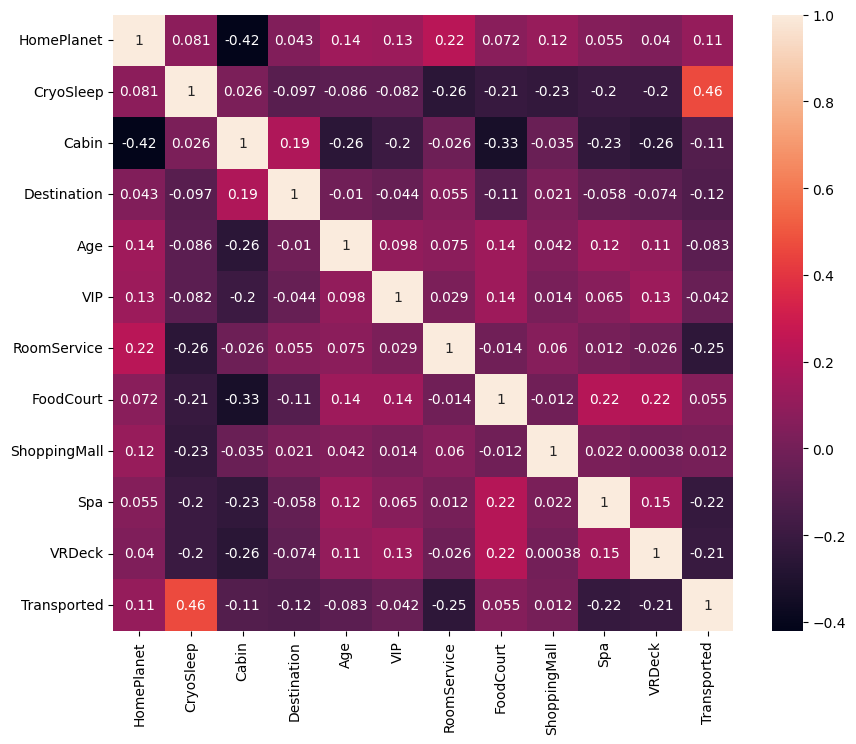

In [429]:
cor_mat = df_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor_mat, annot=True)

In [430]:
df_train.drop(["Age", "VIP", "ShoppingMall"], axis=1, inplace=True)
df_test.drop(["Age", "VIP", "ShoppingMall"], axis=1, inplace=True)

In [431]:
X_train = df_train.drop('Transported', axis=1)
y_train = df_train['Transported']

In [432]:
X_test = df_test.drop('PassengerId', axis=1)
y_test = df_sub['Transported']

In [433]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_train)

array([[ 0.41742617, -0.73866414, -1.82903018, ..., -0.28535504,
        -0.27375941, -0.26953392],
       [-0.83656077, -0.73866414,  0.4020793 , ..., -0.279993  ,
         0.20616519, -0.23049418],
       [ 0.41742617, -0.73866414, -2.38680755, ...,  1.84516272,
         5.59635657, -0.22605785],
       ...,
       [-0.83656077, -0.73866414,  0.95985667, ..., -0.28535504,
        -0.27288523, -0.26953392],
       [ 0.41742617, -0.73866414, -0.15569807, ...,  0.33962066,
         0.03482599,  2.60077382],
       [ 0.41742617, -0.73866414, -0.15569807, ...,  2.50767272,
        -0.27375941, -0.25888672]])

In [434]:
X_train

,HomePlanet,CryoSleep,Cabin,Destination,RoomService,FoodCourt,Spa,VRDeck
0,1,0,1,2,0.0,0.0,0.0,0.0
1,0,0,5,2,109.0,9.0,549.0,44.0
2,1,0,0,2,43.0,3576.0,6715.0,49.0
3,1,0,0,2,0.0,1283.0,3329.0,193.0
4,0,0,5,2,303.0,70.0,565.0,2.0
...,...,...,...,...,...,...,...,...
8688,1,0,0,0,0.0,6819.0,1643.0,74.0
8689,0,1,6,1,0.0,0.0,0.0,0.0
8690,0,0,6,2,0.0,0.0,1.0,0.0
8691,1,0,4,0,0.0,1049.0,353.0,3235.0


In [435]:
X_test

,HomePlanet,CryoSleep,Cabin,Destination,RoomService,FoodCourt,Spa,VRDeck
0,0,1,6,2,0.0,0.0,0.0,0.0
1,0,0,5,2,0.0,9.0,2823.0,0.0
2,1,1,2,0,0.0,0.0,0.0,0.0
3,1,0,2,2,0.0,6652.0,181.0,585.0
4,0,0,5,2,10.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4272,0,1,6,2,0.0,0.0,0.0,0.0
4273,0,0,5,2,0.0,847.0,10.0,144.0
4274,2,1,3,0,0.0,0.0,0.0,0.0
4275,1,0,3,2,0.0,2680.0,0.0,523.0


In [436]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression(max_iter=100)
lrc.fit(X_train, y_train)
y_preds_lrc = lrc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [437]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_preds_lrc))

0.502221183072247


In [438]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_preds_dtc = dtc.predict(X_test)

In [439]:
print(accuracy_score(y_test, y_preds_dtc))

0.44049567453822774


In [441]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
y_preds_rfc = rfc.predict(X_test)

In [442]:
print(accuracy_score(y_test, y_preds_rfc))

0.46902034136076687
